In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentNonStationary import EnvironmentNonStationary
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.UCBLearnerActive import UCBLearnerActive

%matplotlib inline

In [2]:
cust_json = "customer_n_s.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [[0, 2, 0, 2, 0], [3, 3, 1, 2, 0], [3, 2, 2, 1, 2]] [970.7239928, 2231.5900995200004, 4212.914862704001] [9.707239928, 22.315900995200003, 42.12914862704001]


In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 1

In [4]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
print(ucb6_learner.get_conv_rate_history())
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
[2, 2, 2, 3, 2]
[1, 3, 2, 3, 2]
[3, 2, 3, 2, 1]
[2, 2, 2, 3, 3]
[3, 2, 1, 2, 1]
[1, 3, 3, 2, 2]
[3, 2, 1, 3, 1]
[0, 3, 1, 3, 0]
[3, 2, 1, 3, 2]
loading: [=                             ] 3.3%[2, 2, 3, 2, 1]
abrupt change
[3, 2, 1, 2, 0]
abrupt change
[3, 1, 2, 2, 3]
[3, 2, 1, 2, 1]
[3, 1, 3, 3, 1]
[0, 3, 1, 1, 2]
[0, 2, 2, 1, 1]
[3, 1, 3, 1, 1]
[0, 1, 3, 2, 1]
abrupt change
[0, 2, 1, 3, 0]
loading: [==                            ] 6.7%[0, 3, 0, 1, 0]
[0, 2, 0, 3, 1]
[3, 2, 0, 1, 0]
[0, 2, 2, 2, 1]
[1, 2, 0, 3, 2]
[3, 2, 0, 1, 3]
[2, 2, 0, 1, 1]
[1, 3, 0, 1, 0]
[3, 2, 0, 2, 1]
[0, 2, 2, 2, 2]
loading: [===                           ] 10.0%[3, 2, 1, 3, 1]
[3, 1, 3, 1, 0]
[0, 3, 1, 3, 1]
[0, 2, 2, 3, 1]
[3, 2, 0, 2, 0]
[2, 2, 2, 1, 2]
abrupt change
[0, 2, 2, 1, 1]
[0, 2, 0, 1, 3]
[3, 2, 0, 1, 1]
[1, 2, 0, 1, 2]
loading: [====                          ] 13.3%[0, 2, 2, 1, 0]
abrupt change
[0, 1, 3, 1, 2]
[3, 2, 0, 1,

(1, 300)

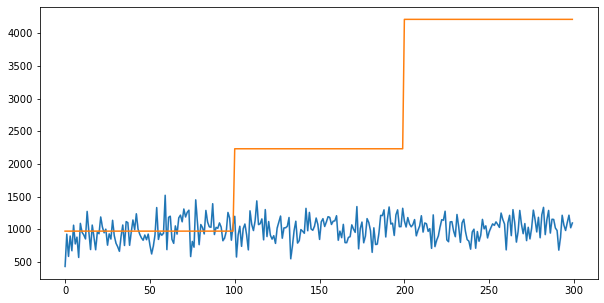

In [7]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)


plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

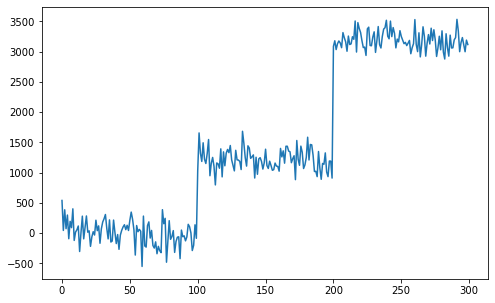

In [9]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

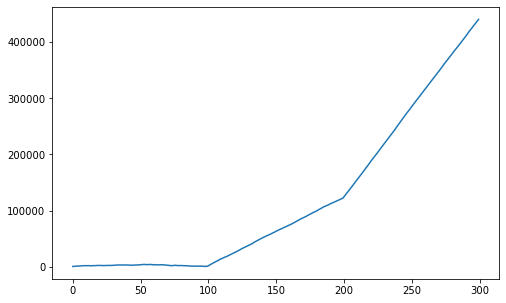

In [10]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

In [ ]:
n_products

In [ ]:
n_arms

In [ ]:
from random import randrange
array = np.zeros((n_products,n_arms))
for i in range(n_products):
    for j in range(n_arms):
        array[i,j] = randrange(1,10) /10

In [ ]:
array

In [ ]:
randrange(0,1)